In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
data= pd.read_csv("data.csv")
data

,year,id,קוד_סקר,קודביתחולים,קוד,code_hospital,מגדר,מחלקת_אשפוז,קופת_חולים_בה_מבוטח,הגעה_מהמיון_דחוף__אלקטיבי,...,Q31_5down,AGE_TODAY,KUPAT_HOLIM,baalut,weightKlali,weightPnimi,weightChirurg,weightOther,accredit,age
0,2016,600001,1,1101,A,1.0,נקבה,10013,כללית,דחוף,...,NaN,66,1.0,1,2.03,1.39,NaN,NaN,NaN,3
1,2016,600002,1,1101,A,1.0,נקבה,13102,מכבי,אלקטיבי,...,0.0,69,4.0,1,2.03,NaN,0.29,NaN,NaN,3
2,2016,600003,1,1101,A,1.0,זכר,13003,כללית,הגעה ממיון,...,1.0,26,1.0,1,2.03,NaN,0.29,NaN,NaN,1
3,2016,600004,1,1101,A,1.0,נקבה,13102,לאומית,אלקטיבי,...,0.0,70,2.0,1,2.03,NaN,0.29,NaN,NaN,3
4,2016,600005,1,1101,A,1.0,זכר,13102,מכבי,אלקטיבי,...,0.0,59,4.0,1,2.03,NaN,0.29,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,2016,611095,1,1103,AB,2.7,זכר,13101,כללית,דחוף,...,NaN,78,1.0,1,1.07,NaN,NaN,NaN,NaN,3
11095,2016,611096,1,1103,AB,2.7,זכר,13200,מאוחדת,אלקטיבי,...,NaN,62,3.0,1,1.07,NaN,NaN,NaN,NaN,2
11096,2016,611097,1,1103,AB,2.7,נקבה,13002,מאוחדת,דחוף,...,0.0,84,3.0,1,1.07,NaN,NaN,NaN,NaN,3
11097,2016,611098,1,1103,AB,2.7,נקבה,13002,כללית,דחוף,...,0.0,80,1.0,1,1.07,NaN,NaN,NaN,NaN,3


# Deleting columns

#### Empty columns

In [3]:
print(data['Q21'].unique())
print(data['Q39'].unique())
print(data['accredit'].unique())
data.drop(columns=['Q21', 'Q39','accredit'], inplace=True)

[nan]
[nan]
[nan]


#### Duplicate and irrelevant columns
For example-
* year- Not relevant because all data is based on 2016
* Survey code- No relevant information
* age- There is an additional column that is already divided into age range categories
* Gender, ID, Language, Age, Education, Health Insurance Fund, Hospital Code, Department, Code, Hospitalization Department and Health Status- Duplicate columns

In [4]:
data.drop(columns=['year', 'age', 'מגדר', 'קודביתחולים', 'קוד_סקר', 'קופת_חולים_בה_מבוטח','lang', 'HEALTH_STATUS', 'education', 'id', 'קוד', 'מחלקה','AGE_TODAY_G','מחלקת_אשפוז'], inplace=True)

#### Per columns
From a report we found on the ministry's website, these columns are cross-cluster score columns, which combine several questions and weight them according to the ministry's preference.
This is irrelevant to us because it is not described to us which columns were taken into account, and according to what weight, so we decided to delete them.

In [5]:
data.drop(columns=['NURSESPER', 'DOCTORSPER', 'TIPULIPER', 'MEIDAPER_right','SHICHRURPER','ENVIRPER','YACHASPER','MEIDALATPER','RETZEFPER','HAATZAMAPER','TNAYMPER','YAYILUTPER','GoodHandsPER','TIPULI4PER'], inplace=True)

#### Weight columns
According to the website, the weight columns are the weight columns of each patient for the benefit of the national score/hospital score. There are 4 weight columns given - general, internal department, surgical department, and all the rest. Here too, we did not understand which columns were taken into account and according to what, so we decided to delete them.

In [6]:
data.drop(columns=['weightPnimi', 'weightChirurg', 'weightOther', 'weightKlali'], inplace=True)

#### Binary columns- created by the Ministry of Health
The data was divided into two categories (dichotomous columns). Above a certain threshold, one category received a 1 and below that threshold, the other category received a 0. Because we chose to do Feature Engineering differently, these columns are not useful, so we deleted them.

##### Dicho columns

In [7]:
data.drop(columns=['Q3_Dicho', 'q4r_Dicho', 'q5r_Dicho', 'q6r_Dicho', 'q7r_Dicho', 'q8r_Dicho', 'q9r_Dicho', 'q10r_Dicho', 'q11r_Dicho', 'q12r_dicho', 'q13r_Dicho', 'q14r_Dicho', 'q15r_Dicho', 'q16r_Dicho', 'q17r_Dicho', 'q18r_Dicho', 'q19r_Dicho', 'q20r_dicho', 'q21r_Dicho', 'q22r_Dicho', 'q23r_Dicho', 'q24r_Dicho', 'q25r_dicho', 'q26r_dicho', 'q27r_Dicho', 'q28r_Dicho', 'q29r_Dicho', 'q30r_Dicho', 'Q31_Dicho'], inplace=True)

##### G columns

In [8]:
data.drop(columns=['Q3_G', 'q31_G'], inplace=True)

##### Down columns

In [9]:
data.drop(columns=['Q3_5down', 'Q31_5down'], inplace=True)

### Outlier values
Meaning of these values ​​from the patient's perspective - irrelevant, we will turn them into missing values ​​and deal with them at a later stage.
99- Don't know/not relevant/refuse to answer

In [10]:
data.replace(99, np.nan, inplace=True)

Choice column- We found outlier values. This column describes whether the caregiver was given the option to choose a hospital where they would be treated. The answers to the survey are 1 given, 0 not given. We saw that an outlier value 3 also appears, which constitutes a few rows from the data, so we chose to remove them.

In [11]:
data = data[data['CHOICE'] != 3]

### Correlation between variables
We will make a correlation between 2 variables that seem to us to have a high correlation. And if there is a strong relationship between 2 variables, one of them will be deleted

#### r columns
We noticed that many of the questions with the prefix r were repetitive, so we checked the correlation between them to understand the connection and whether they were necessary. The correlation came out to be strongly negative (exactly -1), meaning that it was the same information that added no value to us, so we decided to remove these columns from the data.

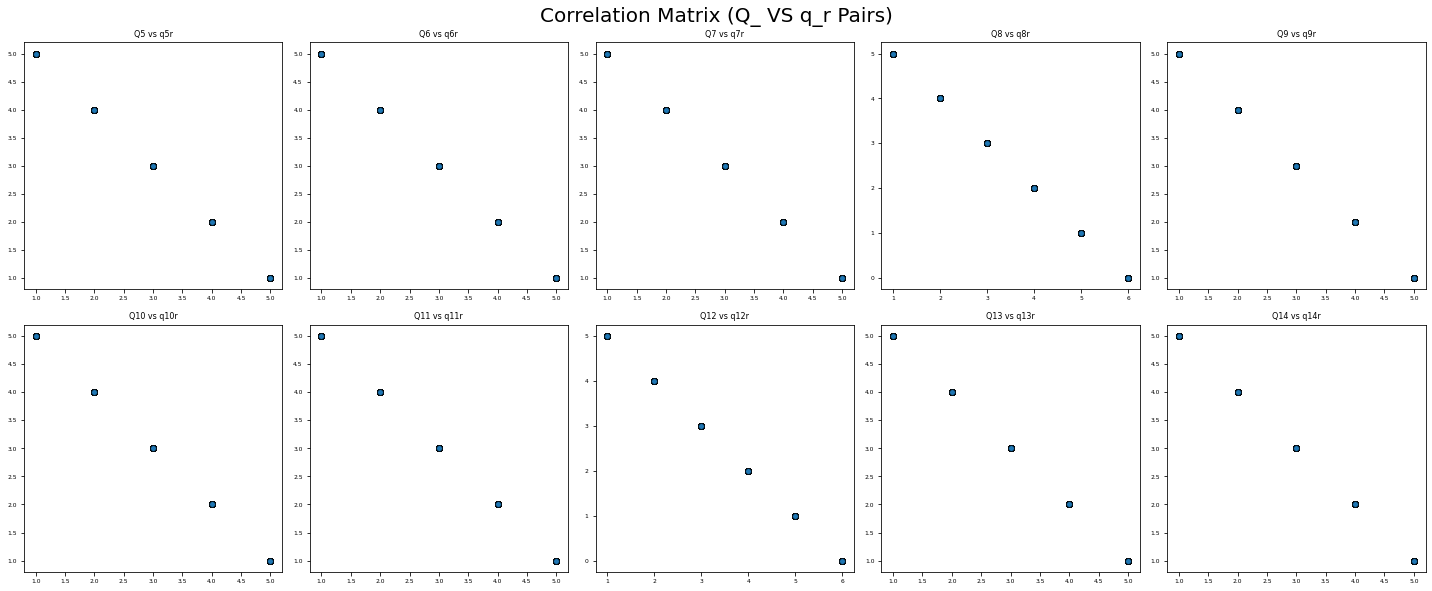

In [12]:
###GPT###
#We will check a different column each time.
correlationQ4_q4r = data['Q4'].corr(data['q4r']) #-1
# Conclusion - The relationship between the regular columns and the r columns shows a strong negative relationship

#We will represent this on a graph by a regular column against the r column.
column_pairs = [
    ('Q5', 'q5r'), ('Q6', 'q6r'), ('Q7', 'q7r'), ('Q8', 'q8r'), ('Q9', 'q9r'),
    ('Q10', 'q10r'), ('Q11', 'q11r'), ('Q12', 'q12r'), ('Q13', 'q13r'), ('Q14', 'q14r')
]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for idx, (q_col, qr_col) in enumerate(column_pairs):
    i, j = divmod(idx, 5)
    axes[i, j].scatter(data[q_col], data[qr_col], alpha=0.6, edgecolors='k')
    axes[i, j].set_title(f'{q_col} vs {qr_col}', fontsize=8)
    axes[i, j].tick_params(axis='both', which='major', labelsize=6)
plt.tight_layout()
plt.suptitle('Correlation Matrix (Q_ VS q_r Pairs)', y=1.02, fontsize=20)
plt.show()
####

Following the strong negative correlation of -1, meaning there is no new information in the column - it is the same information that does not add value to us, so we decided to remove these columns from the data.
We noticed that the inverse columns are the columns called qNUMr

In [13]:
data.drop(columns=[ 'q4r','q5r','q6r','q7r','q8r','q9r','q10r','q11r','q12r','q13r','q14r','q15r','q16r','q17r','q18r','q19r','q20r','Q21R','q21r_2016','q22r','q23r','q24r','q25r','q26r','q27r','q28r','q29r','q30r'], inplace=True)

In [14]:
correlation_CORR = data['corridor1'].corr(data['Q34']) #0.94

Due to a strong positive correlation, this is identical information, so we deleted one of the columns.

In [15]:
data.drop(columns=['Q34'], inplace=True)

# Missing values

In [16]:
data.columns[data.isnull().any()]

Index(['Miyun_or_Electiv', 'Education_2', 'CHRONIC_2', 'HEALTH_Status_2', 'Q3',
       'Q31', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21_2016', 'Q22',
       'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q33',
       'AGE_TODAY', 'KUPAT_HOLIM'],
      dtype='object')

#### 'Miyun_or_Electiv' column
* We saw that this column constitutes categorical values ​​for the column "arrival_from_emergency_urgent__elective" so that 1- urgent/emergency, 0- elective.
* We saw that all the values ​​for "Rami- ward" are missing values, they do not have a value of 0/1.
* We have no information whether Rami's columns were left empty on purpose or not - it is possible that these values ​​do not belong to any category, that is, they belong to a third category or belong to one of them. We decided to remove them because we do not understand medicine, and because this is a small number of rows (26)
* In addition, we will delete the column "arrival_from_emergency_urgent__elective" which is identical to

In [17]:
data['Miyun_or_Electiv'].isna().sum() #26
data.dropna(subset=['Miyun_or_Electiv'], inplace=True)
data.drop(columns=['הגעה_מהמיון_דחוף__אלקטיבי'], inplace=True)

#### 'Education_2' column
We conducted an online search and saw that 47% of people in Israel are academics and 53% are non-academics, so we decided to fill in the missing values ​​according to this proportion.

In [18]:
academic_ratio = 0.47  # 47% academics
non_academic_ratio = 0.53  # 53% non-academics 
data['Education_2'] = data['Education_2'].apply(
    lambda x: np.random.choice([1, 0], p=[academic_ratio, non_academic_ratio])
)

#### 'CHRONIC_2' column
Filling missing values with 0 in this column, meaning - do not suffer from chronic diseases. Because we assumed that most people do not have chronic diseases.

In [19]:
data['CHRONIC_2'].fillna(0, inplace=True)

#### 'HEALTH_Status_2' column
We saw that the values were distributed almost equally, so we decided to fill in the missing values in a proportion of 50% each

In [20]:
data['HEALTH_Status_2'].value_counts() #1-5631, 0-5214

HEALTH_ratio = 0.5
non_HEALTH_ratio = 0.5
data['HEALTH_Status_2'] = data['HEALTH_Status_2'].apply(
    lambda x: np.random.choice([1, 0], p=[HEALTH_ratio, non_HEALTH_ratio]))

#### 'Q3' column- satisfaction
The main column that we want to predict, so filling in the missing values can change our results. We decided to delete the rows where the missing values exist.

In [21]:
data['Q3'].isna().sum() #159
data.dropna(subset=['Q3'], inplace=True)

#### 'Q31' column- Recommendation for relatives to be hospitalized in the same hospital
We decided to fill in the median value.

In [22]:
data['Q31'].median() #9- אמליץ
data['Q31'].fillna(9, inplace=True)

#### 'KUPAT_HOLIM' column
We saw that there were 23 missing values, we decided to fill them in with the most common value - 'Klalit' (1)

In [23]:
data['KUPAT_HOLIM'].isna().sum() #23
data['KUPAT_HOLIM'].mode()[0] #1- כללית
data['KUPAT_HOLIM'].fillna(1, inplace=True)

#### 'Q' column
In the data, there are special values- numbered 98,97 - which mean not relevant/refuse to answer. We moved them to another and final category, numbered 6.

In [24]:
data['Q4'] = data['Q4'].replace(98, 6) 
data['Q13'] = data['Q13'].replace(98, 6) 
data['Q16'] = data['Q16'].replace(98, 6)
data['Q18'] = data['Q18'].replace({97: 6, 98: 7})
data['Q29'] = data['Q29'].replace(98, 6)
data['Q30'] = data['Q30'].replace(98, 6)
data['Q36'] = data['Q36'].replace(7, np.nan)
data['Q37'] = data['Q37'].replace(7, np.nan)

Function that replaces missing values with the common value

In [25]:
####GPT###
def fill_missing_with_most_common(data, columns):
    for column in columns:
        most_common_value = data[column].mode()[0]  #The most common value
        data[column].fillna(most_common_value, inplace=True)
    return data
# List of columns with missing values
columns_to_check = ['AGE_TODAY', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
                    'Q19', 'Q20', 'Q21_2016', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q33', 'Q36']

data = fill_missing_with_most_common(data, columns_to_check)
####

# Renaming columns

In [26]:
#2 We will unite values that describe the same hospital - Assaf Harofeh
data['code_hospital'] = data['code_hospital'].replace(2.70, 27)

In [27]:
def rename_columns_with_defaults(data):
    new_column_names = {
        'code_hospital': 'Hospital',
        'Code_ward': 'Ward',
        'SIZE_new': 'Size_hospital',
        'Miyun_or_Electiv': 'Is_electiv',
        'CHOICE': 'Choice',
        'corridor1': 'Is_corridor',
        'AGE_TODAY': 'Age',
        'Education_2': 'Education',
        'CHRONIC_2': 'Chronic',
        'HEALTH_Status_2': 'Health_status',
        'Q3': 'Satisfaction',
        'Q31': 'Recommendation',
        "Q4": "ER_Treatment_Satisfaction",
        "Q5": "Admission_Efficiency",
        "Q6": "Nurse_Respect",
        "Q7": "Nurse_Listening",
        "Q8": "Nurse_Explanation_Clarity",
        "Q9": "Doctor_Respect",
        "Q10": "Doctor_Personal_Care",
        "Q11": "Doctor_Listening",
        "Q12": "Doctor_Explanation_Clarity",
        "Q13": "Staff_Knowledge",
        "Q14": "Proactive_Communication",
        "Q15": "Team_Coordination",
        "Q16": "Pain_Management",
        "Q17": "Safety_Measures",
        "Q18": "Patient_Involvement",
        "Q19": "Alternative_Treatments",
        "Q20": "Next_Steps_Clarity",
        "Q21_2016": "Response_Ease",
        "Q22": "Safe_Hands_Feeling",
        "Q23": "Discharge_Efficiency",
        "Q24": "Discharge_Problem_Explanation",
        "Q25": "Discharge_Followup_Clarity",
        "Q26": "Room_Cleanliness",
        "Q27": "Room_Conditions",
        "Q28": "Night_Quietness",
        "Q29": "Food_Satisfaction",
        "Q30": "Visitor_Comfort",
        "Q33": "Primary_Language",
        "Q36": "Living_Situation",
        "Q37": "Religious_Affiliation",
        'baalut': 'Ownership',
        'KUPAT_HOLIM': 'Health insurance',
        'gender': 'Gender'
    }

    return data.rename(columns=new_column_names)

data = rename_columns_with_defaults(data)

# Categorization of the columns

In [28]:
# Transfer to integers
data= data.apply(pd.to_numeric).astype(int)
data

,Hospital,Ward,Size_hospital,Is_electiv,Choice,Is_corridor,Gender,Education,Chronic,Health_status,...,Room_Conditions,Night_Quietness,Food_Satisfaction,Visitor_Comfort,Primary_Language,Living_Situation,Religious_Affiliation,Age,Health insurance,Ownership
2,1,2,3,1,0,0,1,0,1,1,...,4,4,4,5,3,6,6,26,1,1
3,1,2,3,0,1,1,0,0,1,0,...,1,1,1,1,3,2,6,70,2,1
4,1,2,3,0,1,1,1,0,0,1,...,2,2,6,2,1,2,6,59,4,1
7,2,1,3,1,1,1,0,0,1,1,...,1,1,1,1,4,2,6,79,1,1
8,2,3,3,1,1,1,0,1,0,1,...,1,1,1,1,3,1,6,77,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,27,2,2,1,1,1,0,1,0,0,...,1,4,6,3,4,2,1,67,4,1
11094,27,2,2,1,1,1,1,1,1,0,...,2,2,6,2,4,2,1,78,1,1
11095,27,3,2,0,1,0,1,0,0,1,...,1,3,2,1,4,2,1,62,3,1
11096,27,2,2,1,0,1,0,0,0,0,...,1,2,6,3,4,2,1,84,3,1


##### Categories for "Age" column:
Division into categories by age groups.

In [29]:
def categorize_age(age):
    if 18 <= age <= 24:
        return 1
    elif 25 <= age <= 34:
        return 2
    elif 35 <= age <= 44:
        return 3
    elif 45 <= age <= 54:
        return 4
    elif 55 <= age <= 64:
        return 5
    elif 65 <= age <= 74:
        return 6
    elif 75 <= age <= 84:
        return 7
    elif age >= 85:
        return 8
    else:
        return None  

data['Age'] = data['Age'].apply(categorize_age)

##### Categories for "Hospital" column:
Creating a new column for categorizing by regions in the country- periphery=1, or non-periphery=0.
We will delete old columns that we replaced with another column that is categorical.

In [30]:
###GPT###
data['Hospital_Periphery'] = data['Hospital'].apply(lambda x: 0 if x in [
    1, 27, 3, 5, 9, 11, 13, 14, 17, 19, 20, 23, 24, 26
] else 1)
####

In [31]:
columns_drop_old = ['Hospital']
data = data.drop(columns=columns_drop_old)

##### Categories for "Satisfaction" column:
Categorized by very satisfied=1, satisfied=2, unsatisfied=3.

In [32]:
def categorize_Satisfaction(satisfaction):
    if 1 <= satisfaction <= 3: #Unsatisfied
        return 3
    elif 4 <= satisfaction <= 7: #Satisfied
        return 2
    elif 8 <= satisfaction <= 10: #Very satisfied
        return 1
    else:
        return None

data['Satisfaction'] = data['Satisfaction'].apply(categorize_Satisfaction)

# Initial data analysis by visualization

### Graph of age distribution of those who participated in the survey

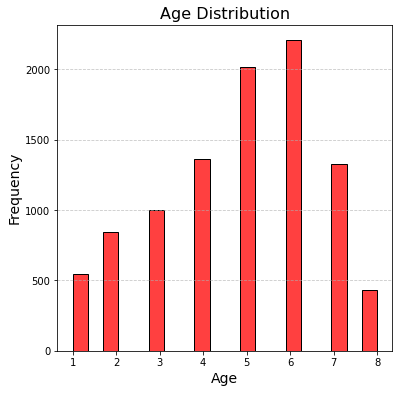

In [33]:
###GPT###
plt.figure(figsize=(6, 6))
sns.histplot(data['Age'], bins=20,  color='red', edgecolor='black', kde_kws={'bw_adjust': 1})
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
####

Dividing ages into groups:
* 1: 18-24
* 2: 25-34
* 3: 35-44
* 4: 45-54
* 5: 55-64
* 6: 65-74
* 7: 75-84
* 8: 85+
* Most of the patients who participated in the survey were older, between the ages of 55 and 74

### The graph shows, for each language, whether the patient understood the explanations upon discharge.

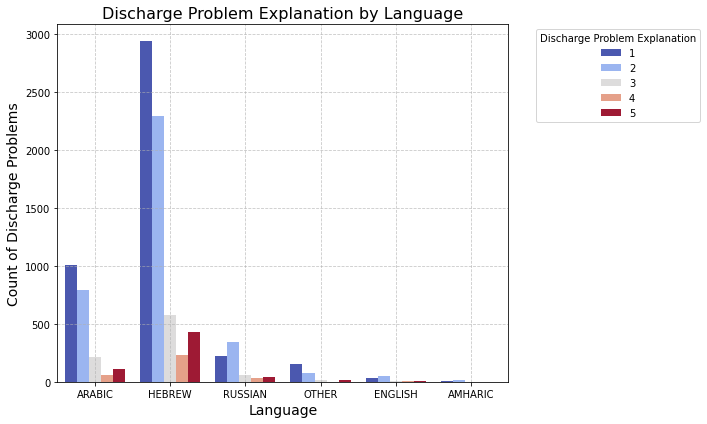

In [34]:
###GPT###
language_mapping = {
    1: 'HEBREW',
    2: 'ENGLISH',
    3: 'ARABIC',
    4: 'RUSSIAN',
    5: 'AMHARIC',
    6: 'OTHER'}

plt.figure(figsize=(10, 6))
sns.countplot(
    x=data['Primary_Language'].map(language_mapping),
    hue='Discharge_Problem_Explanation', 
    data=data,
    palette='coolwarm')

plt.title("Discharge Problem Explanation by Language", fontsize=16)
plt.xlabel("Language", fontsize=14)
plt.ylabel("Count of Discharge Problems", fontsize=14)
plt.legend(title="Discharge Problem Explanation", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
####

It seems that most patients receive a clear explanation before being discharged from the hospital.

### Satisfaction graph against hospital food & against patient engagement

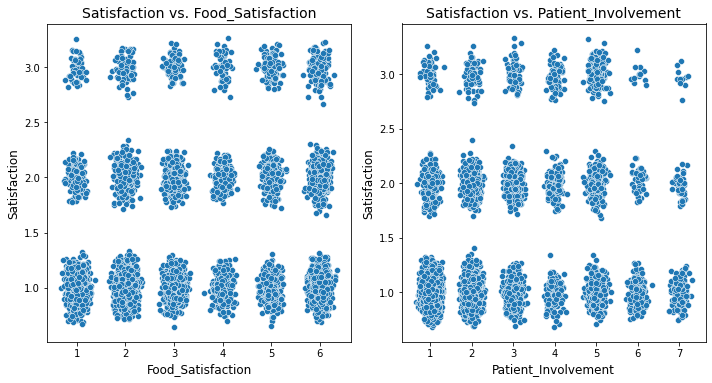

In [35]:
###GPT###
variables = ['Food_Satisfaction', 'Patient_Involvement']

plt.figure(figsize=(10, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[var] + np.random.normal(0, 0.1, len(data)), 
                    y=data['Satisfaction'] + np.random.normal(0, 0.1, len(data)))
    plt.title(f"Satisfaction vs. {var}", fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Satisfaction', fontsize=12)
plt.tight_layout()
plt.show()
####

* In the graph on the right we can see that most patients did not feel involved in the treatment, which is why they also scored low.
* In the graph on the left it appears that most people are not satisfied with the food served in hospitals.

### Graph of patient age against noise at night

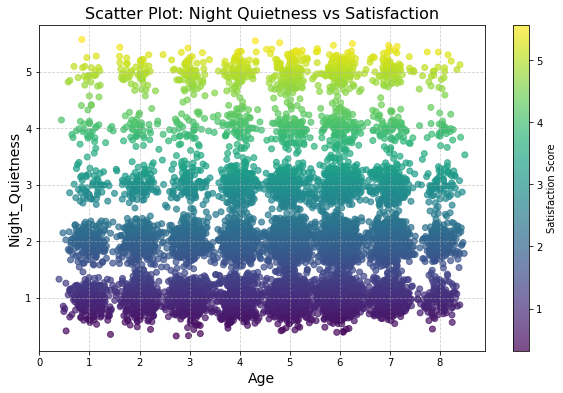

In [36]:
###GPT###
noise_level = 0.2 
x = data['Age'] + np.random.normal(0, noise_level, len(data))  
y = data['Night_Quietness'] + np.random.normal(0, noise_level, len(data)) 

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, c=y, cmap='viridis')
plt.title('Scatter Plot: Night Quietness vs Satisfaction', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Night_Quietness', fontsize=14)

cbar = plt.colorbar()
cbar.set_label('Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
####

Conclusion - Patients of all ages complained about noise in hospitals, and older people tend to complain more.

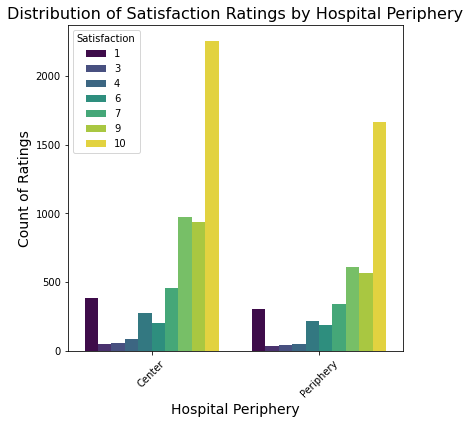

In [37]:
###GPT###
periphery_mapping = {
    1: 'Periphery',  
    0: 'Center' }

grouped = data.groupby(['Hospital_Periphery', 'Recommendation']).size().reset_index(name='Count')

plt.figure(figsize=(6,6))
sns.barplot(
    data=grouped,
    x=grouped['Hospital_Periphery'].map(periphery_mapping),  # מיפוי ערכי פריפריה
    y='Count',
    hue='Recommendation',
    palette='viridis')

plt.title('Distribution of Satisfaction Ratings by Hospital Periphery', fontsize=16)
plt.xlabel('Hospital Periphery', fontsize=14)
plt.ylabel('Count of Ratings', fontsize=14)
plt.legend(title='Satisfaction', loc='upper left', bbox_to_anchor=(0, 1)) 
plt.xticks(rotation=45)
plt.show()
####

It seems that hospitals in the center are more popular than hospitals in the periphery. Furthermore, the distribution is similar in both areas.

# Classification
## Predicting patient satisfaction

#### We will convert the values to int

In [38]:
df = data.copy()
df= df.apply(pd.to_numeric).astype(int)

#### One-Hot Encoding: We will handle columns that are categorical numeric, but the numbers have no order importance: One-Hot Encoding

In [39]:
df = pd.get_dummies(df, columns=['Ward','Primary_Language', 'Living_Situation', 'Religious_Affiliation', 'Age',
       'Health insurance', 'Ownership'], drop_first=False)
df = df.astype(int)

#### We will check if there is a high correlation between variables that may lead to excess information.

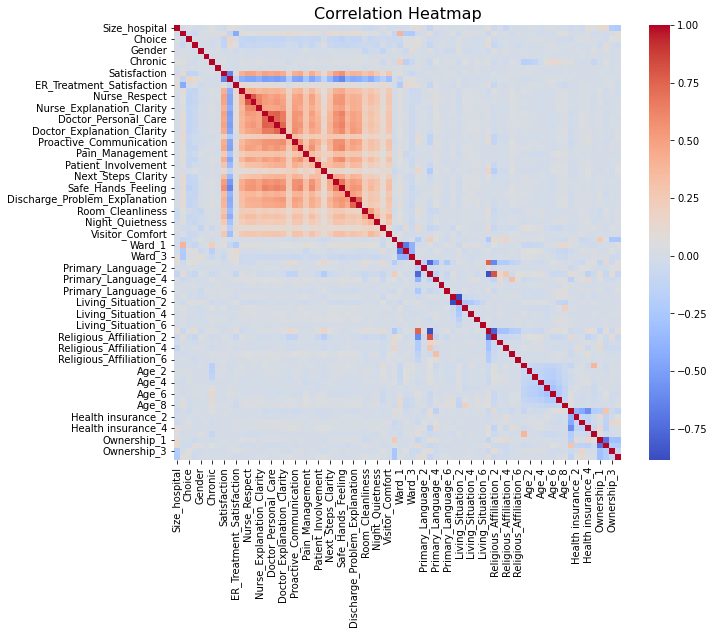

In [40]:
###GPT###
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()
####

#### We will make sure that the data does not contain text columns or uncoded categories, and that there are no missing values.

In [41]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 9732 entries, 2 to 11098
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Size_hospital                  9732 non-null   int32
 1   Is_electiv                     9732 non-null   int32
 2   Choice                         9732 non-null   int32
 3   Is_corridor                    9732 non-null   int32
 4   Gender                         9732 non-null   int32
 5   Education                      9732 non-null   int32
 6   Chronic                        9732 non-null   int32
 7   Health_status                  9732 non-null   int32
 8   Satisfaction                   9732 non-null   int32
 9   Recommendation                 9732 non-null   int32
 10  ER_Treatment_Satisfaction      9732 non-null   int32
 11  Admission_Efficiency           9732 non-null   int32
 12  Nurse_Respect                  9732 non-null   int32
 13  Nurse_Listening       

#### Place the column you want to predict at the end of the data.

In [42]:
target_column = 'Satisfaction'
columns = [col for col in df.columns if col != target_column] + [target_column]
df = df[columns]
df

,Size_hospital,Is_electiv,Choice,Is_corridor,Gender,Education,Chronic,Health_status,Recommendation,ER_Treatment_Satisfaction,...,Health insurance_1,Health insurance_2,Health insurance_3,Health insurance_4,Health insurance_5,Ownership_1,Ownership_2,Ownership_3,Ownership_5,Satisfaction
2,3,1,0,0,1,0,1,1,1,5,...,1,0,0,0,0,1,0,0,0,3
3,3,0,1,1,0,0,1,0,10,1,...,0,1,0,0,0,1,0,0,0,1
4,3,0,1,1,1,0,0,1,8,5,...,0,0,0,1,0,1,0,0,0,1
7,3,1,1,1,0,0,1,1,8,5,...,1,0,0,0,0,1,0,0,0,1
8,3,1,1,1,0,1,0,1,10,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,2,1,1,1,0,1,0,0,6,2,...,0,0,0,1,0,1,0,0,0,1
11094,2,1,1,1,1,1,1,0,9,4,...,1,0,0,0,0,1,0,0,0,1
11095,2,0,1,0,1,0,0,1,9,2,...,0,0,1,0,0,1,0,0,0,1
11096,2,1,0,1,0,0,0,0,7,3,...,0,0,1,0,0,1,0,0,0,2


#### Convert the data to a row vector, and the prediction column separately as a value of .

In [43]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 1-Training the K-NN model on the Training set

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3]) #Unsatisfied- 3, Satisfied- 2, Very satisfied- 1
print(cm)
accuracy_score(y_test, y_pred)

[[1369   65    5]
 [ 224  159   12]
 [  21   45   47]]


0.8089368258859785

##### Accuracy- Grid Search & Cross Validation  

In [47]:
###GPT###
# Defining the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],    
    'metric': ['euclidean', 'manhattan'],  
    'weights': ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.2f}") 
####

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.80


## 2-Training the Logistic Regression model on the Training set

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1373   61    5]
 [ 211  171   13]
 [  14   48   51]]


0.8192090395480226

##### Accuracy- Grid Search & Cross Validation  

In [50]:
###GPT###
# Defining the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'C': [0.01, 0.1, 1, 10, 100],                 
    'solver': ['liblinear', 'saga'],               
    'max_iter': [100, 5000, 1000]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.2f}") 
####

Best Parameters: {'C': 0.1, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.81


## 3-Training the SVM model on the Training set

In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1376   57    6]
 [ 226  153   16]
 [  15   44   54]]


0.8130457113507961

##### Accuracy- Grid Search & Cross Validation  

In [53]:
###GPT###
# Defining the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],           
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'gamma': ['scale', 'auto'] }

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.2f}") 
####

KeyboardInterrupt: 

## 4-Training the kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

##### Accuracy- Grid Search & Cross Validation  

In [ ]:
###GPT###
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SVC classifier
classifier = SVC(random_state=0)

# Step 2: Set up the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],      # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf']            # We are using only the RBF kernel
}

# Step 3: Perform Grid Search
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,          # 5-fold cross-validation
                           n_jobs=-1)     # Use all available cores
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters and best model
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 5: Evaluate the best model on the test set
y_pred = best_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy on Test Data: {accuracy}")

# Step 6: Compute Permutation Importance
perm_importance = permutation_importance(best_classifier, X_test, y_test, scoring='accuracy')

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Print feature importance
print("\nFeature Importance (Permutation):")
for idx in sorted_idx:
    print(f"Feature {idx + 1}: {perm_importance.importances_mean[idx]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.xticks(range(len(sorted_idx)), [f"Feature {i+1}" for i in sorted_idx], rotation=90)
plt.ylabel("Permutation Importance")
plt.xlabel("Feature")
plt.title("Feature Importance with RBF Kernel (after Grid Search)")
plt.tight_layout()
plt.show()
####

## 5-Training the Decision Trees model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

##### Accuracy- Grid Search & Cross Validation  

In [ ]:
###GPT###
# Defining the parameter grid for Decision Trees
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  
    'splitter': ['best', 'random'],              
    'max_depth': [None, 5, 10, 20],            
    'min_samples_split': [2, 5, 10],             
    'min_samples_leaf': [1, 2, 4]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)
print(f"Best Parameters: {grid.best_params_}") 
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.2f}") 
####

## 6-Training the Random Forest model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

##### Accuracy- Grid Search & Cross Validation  

In [ ]:
###GPT###
# Defining the parameter grid for  Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],            
    'criterion': ['gini', 'entropy', 'log_loss'],  
    'max_depth': [None, 10, 20, 30],            
    'min_samples_split': [2, 5, 10],             
    'min_samples_leaf': [1, 2, 4],               
    'max_features': ['sqrt', 'log2', None],      
    'bootstrap': [True, False]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.2f}")
####

## 7-Training the Neural Network model on the Training set

In [ ]:
###GPT###
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

classifier = MLPClassifier(
    hidden_layer_sizes=(128, 64), 
    activation='relu',            
    solver='adam',            
    alpha=0.00062,               
    learning_rate_init=0.00062,   
    max_iter=300,                 
    early_stopping=True,         
    n_iter_no_change=35,          
    random_state=42)
classifier.fit(X_train, y_train)
####

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = classifier.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

##### Accuracy- Grid Search & Cross Validation  עם פיצ'רים שמשפיעים

In [ ]:
###GPT###
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the MLPClassifier
classifier = MLPClassifier(
    random_state=42,
    early_stopping=True)

# Step 2: Set up the parameter grid for Grid Search
param_grid = {
    'hidden_layer_sizes': [(128, 64), (100, 50), (64, 32)], 
    'activation': ['relu', 'tanh'],                         
    'solver': ['adam', 'sgd'],                              
    'alpha': [0.0001, 0.00062, 0.001],                      
    'learning_rate_init': [0.001, 0.00062, 0.01]}

# Step 3: Perform Grid Search
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,          
                           n_jobs=-1)     
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters and best model
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 5: Evaluate the best model on the test set
y_pred = best_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy on Test Data: {accuracy}")

# Step 6: Compute Permutation Importance
perm_importance = permutation_importance(best_classifier, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Print feature importance
print("\nFeature Importance (Permutation):")
for idx in sorted_idx:
    print(f"Feature {idx + 1}: {perm_importance.importances_mean[idx]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.xticks(range(len(sorted_idx)), [f"Feature {i+1}" for i in sorted_idx], rotation=90)
plt.ylabel("Permutation Importance")
plt.xlabel("Feature")
plt.title("Feature Importance with MLPClassifier (after Grid Search)")
plt.tight_layout()
plt.show()
####

# Unsupervised Analysis

### Unify a group of columns with the same meaning
* Unify the columns related to the staff metrics - doctors, nurses, and staff in general - and a weighted score
* Unify the columns related to the hospital discharge experience - and a weighted score

In [54]:
nurse_columns = ['Nurse_Respect', 'Nurse_Listening', 'Nurse_Explanation_Clarity']
doctor_columns = ['Doctor_Respect', 'Doctor_Personal_Care', 'Doctor_Listening', 'Doctor_Explanation_Clarity']
team_columns = ['Staff_Knowledge', 'Proactive_Communication', 'Team_Coordination','Pain_Management', 'Safety_Measures', 'Patient_Involvement', 'Safe_Hands_Feeling']
discharge_columns = ['Alternative_Treatments', 'Next_Steps_Clarity', 'Response_Ease','Discharge_Efficiency']

###GPT###
df['Team_Score'] = (
    df[nurse_columns].sum(axis=1) * 2 +  
    df[doctor_columns].sum(axis=1) * 2 +  
    df[team_columns].sum(axis=1) * 1 )

df['Discharge_Score'] = df[discharge_columns].sum(axis=1) * 1.5  

columns_to_drop = nurse_columns + doctor_columns + team_columns + discharge_columns
df = df.drop(columns=columns_to_drop)
df
####

,Size_hospital,Is_electiv,Choice,Is_corridor,Gender,Education,Chronic,Health_status,Recommendation,ER_Treatment_Satisfaction,...,Health insurance_3,Health insurance_4,Health insurance_5,Ownership_1,Ownership_2,Ownership_3,Ownership_5,Satisfaction,Team_Score,Discharge_Score
2,3,1,0,0,1,0,1,1,1,5,...,0,0,0,1,0,0,0,3,71,18.0
3,3,0,1,1,0,0,1,0,10,1,...,0,0,0,1,0,0,0,1,21,6.0
4,3,0,1,1,1,0,0,1,8,5,...,0,1,0,1,0,0,0,1,44,15.0
7,3,1,1,1,0,0,1,1,8,5,...,0,0,0,1,0,0,0,1,47,15.0
8,3,1,1,1,0,1,0,1,10,1,...,0,1,0,1,0,0,0,1,21,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,2,1,1,1,0,1,0,0,6,2,...,0,1,0,1,0,0,0,1,33,18.0
11094,2,1,1,1,1,1,1,0,9,4,...,0,0,0,1,0,0,0,1,46,16.5
11095,2,0,1,0,1,0,0,1,9,2,...,1,0,0,1,0,0,0,1,27,13.5
11096,2,1,0,1,0,0,0,0,7,3,...,1,0,0,1,0,0,0,2,58,18.0


In [55]:
X = df.iloc[:, :].values
X

array([[ 3. ,  1. ,  0. , ...,  3. , 71. , 18. ],
       [ 3. ,  0. ,  1. , ...,  1. , 21. ,  6. ],
       [ 3. ,  0. ,  1. , ...,  1. , 44. , 15. ],
       ...,
       [ 2. ,  0. ,  1. , ...,  1. , 27. , 13.5],
       [ 2. ,  1. ,  0. , ...,  2. , 58. , 18. ],
       [ 2. ,  1. ,  1. , ...,  1. , 36. , 12. ]])

### Normalization

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)                  

### PCA
Elbow Method

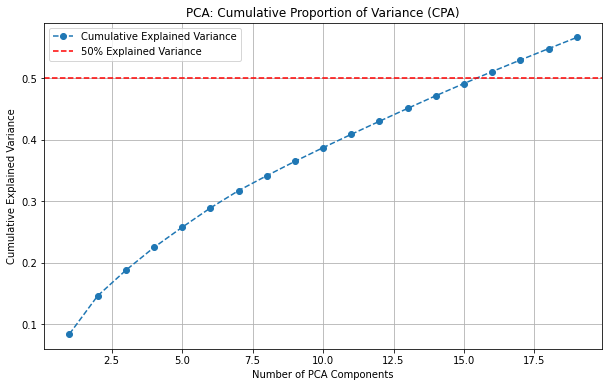

Optimal number of components for 50.0% variance: 16
Shape of original data: (9732, 60)
Shape of PCA-transformed data: (9732, 16)


In [57]:
###GPT###
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

explained_variances = []
for n in range(1, 20):
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), explained_variances, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.50, color='r', linestyle='--', label='50% Explained Variance')  # שינוי הסף ל-85%
plt.title('PCA: Cumulative Proportion of Variance (CPA)')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

threshold = 0.50

optimal_components = next(i for i, var in enumerate(explained_variances, 1) if var >= threshold)
print(f"Optimal number of components for {threshold*100}% variance: {optimal_components}")

pca = PCA(n_components=optimal_components)
pca_result = pca.fit_transform(X_scaled)

print(f"Shape of original data: {df.shape}")
print(f"Shape of PCA-transformed data: {pca_result.shape}")
####

In [58]:
###GPT###
from sklearn.pipeline import make_pipeline
final_pipeline_pca = make_pipeline(PCA(n_components=16)) #Equal to the intersection point of the graphs
pca_result = final_pipeline_pca.fit_transform(X)
pca_result
####

array([[ 33.30284985,  -2.65160742,  -4.45123583, ...,   0.65095025,
          0.71683382,   0.07827103],
       [-19.30122012,  -4.40589663,   1.29534762, ...,   0.54225186,
          0.42682965,  -0.05406062],
       [  5.4078115 ,  -0.07597654,  -0.68203148, ...,   0.62945693,
         -0.19896412,   0.09487936],
       ...,
       [-11.70548966,   1.73725069,   0.8401484 , ...,  -0.03654952,
         -0.15133566,  -0.07479476],
       [ 19.7864814 ,  -0.21843722,   0.49479137, ...,  -0.16544323,
          0.04333467,   0.04331438],
       [ -3.26596386,  -1.61899705,   2.0903335 , ...,  -0.75745549,
         -0.23299796,   0.04619205]])

# K-Means Clustering

### Using the elbow method to find the optimal number of clusters


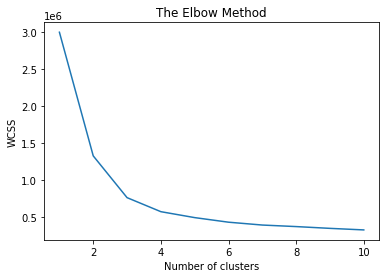

In [59]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

where the graph stops decreasing sharply, that is the optimal number of clusters. Therefore, the optimal number of clusters is 4

## Training the K-Means model on the dataset

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca_result)

In [61]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_result, y_kmeans) 
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.40665717751700753


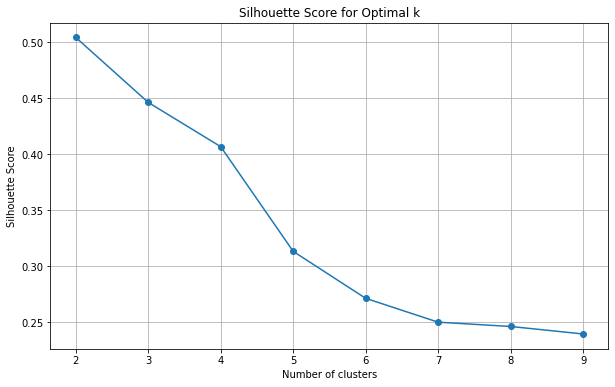

In [62]:
###GPT###
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pca_result)
    score = silhouette_score(pca_result, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()
####

### Visualising the clusters

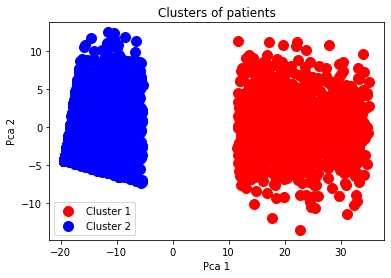

In [65]:
plt.scatter(pca_result[y_kmeans == 0, 0], pca_result[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(pca_result[y_kmeans == 1, 0], pca_result[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.title('Clusters of patients')
plt.xlabel('Pca 1')
plt.ylabel('Pca 2')
plt.legend()
plt.show()

# Improving K-Means

In [67]:
###GPT##
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=42) 

kf = KFold(n_splits=5, shuffle=True, random_state=42)

silhouette_scores = []

for train_index, test_index in kf.split(pca_result):  # pca_result הוא הדאטה שלך
    X_train, X_test = pca_result[train_index], pca_result[test_index]
    kmeans.fit(X_train)
    
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)

print("Silhouette Scores for each fold:", silhouette_scores)
print("Average Silhouette Score:", np.mean(silhouette_scores))
####

Silhouette Scores for each fold: [0.5001433890689548, 0.5075907724077813, 0.5062660337319104, 0.5025263327031323, 0.510034483496601]
Average Silhouette Score: 0.505312202281676


In [68]:
#Centers of mass of the model
kmeans.cluster_centers_

array([[-7.60550709e+00, -2.18721364e-02,  3.61035541e-02,
         1.95190739e-02, -6.14257745e-03,  1.28163166e-02,
        -1.01745556e-02, -2.81391973e-03,  1.69587021e-02,
         7.95100931e-04, -4.39342754e-03, -7.10087083e-05,
        -3.76356489e-03, -2.12793472e-05, -3.33463495e-03,
        -1.60891019e-03],
       [ 2.27664510e+01, -7.20114283e-02, -1.04223201e-01,
        -4.76168096e-02,  4.27915374e-03, -1.99715501e-02,
         4.57196204e-02, -1.20567607e-02, -3.61921223e-02,
        -1.02413087e-02,  2.76772090e-02, -1.97054569e-03,
         2.68311162e-03, -3.69700360e-03,  7.48984424e-03,
        -5.03595748e-03]])

# Feature weights

In [73]:
###GPT##
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=16)
pca_result = pca.fit_transform(X)

print("PCA Components (Weights for each feature):")
print(pca.components_)

print("\nPCA Component 1 Weights (for each feature):")
for i, feature in enumerate(pca.components_[0]):
    print(f"Feature {i+1}: {feature:.4f}")
####

PCA Components (Weights for each feature):
[[-3.97322748e-04  3.00658438e-03 -4.32501230e-03 -1.90999896e-03
  -5.51836442e-04 -2.20667814e-04  8.51480507e-04  5.79760349e-05
  -9.90291483e-02  1.43508259e-02  3.06608516e-02  4.17358217e-02
   4.37777575e-02  1.50084100e-02  2.53907916e-02  2.31069387e-02
   1.89036573e-02  2.48303685e-02 -4.47836167e-04  2.16165446e-03
  -2.15020734e-04 -1.94663373e-03  5.63401599e-04  4.32971131e-05
  -1.46028430e-03  9.58669793e-04  3.32926843e-05 -1.38376891e-04
   3.54846359e-04 -9.40760980e-04  2.30333351e-04  2.00102908e-04
   1.40595639e-04  1.48827222e-05  1.08505411e-03 -1.17642518e-03
  -1.66096012e-04 -1.92523525e-04  3.76914904e-04  7.30756975e-05
   1.33833022e-04  3.79110377e-05 -2.45459358e-04 -3.31583998e-04
  -3.90819795e-04 -3.73018363e-04  6.88090081e-04  4.81047374e-04
  -1.16756885e-03 -5.85301749e-07  5.18703874e-04  7.99723753e-04
  -1.50273476e-04  4.71666464e-04 -6.36706315e-04 -7.20154010e-05
   2.37055252e-04  2.08148818e-02

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9732 entries, 2 to 11098
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size_hospital                  9732 non-null   int32  
 1   Is_electiv                     9732 non-null   int32  
 2   Choice                         9732 non-null   int32  
 3   Is_corridor                    9732 non-null   int32  
 4   Gender                         9732 non-null   int32  
 5   Education                      9732 non-null   int32  
 6   Chronic                        9732 non-null   int32  
 7   Health_status                  9732 non-null   int32  
 8   Recommendation                 9732 non-null   int32  
 9   ER_Treatment_Satisfaction      9732 non-null   int32  
 10  Admission_Efficiency           9732 non-null   int32  
 11  Discharge_Problem_Explanation  9732 non-null   int32  
 12  Discharge_Followup_Clarity     9732 non-null   int32

# Hierarchical Clustering
We used all the data because all the columns are numeric.

## Using the dendrogram to find the optimal number of clusters

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  
dendrogram = sch.dendrogram(sch.linkage(pca_result, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
y_hc = hc.fit_predict(pca_result)

In [ ]:
silhouette_avg = silhouette_score(pca_result, y_hc)  
print(f"Silhouette Score: {silhouette_avg}")

## Visualising the clusters

In [ ]:
plt.scatter(pca_result[y_hc == 0, 0], pca_result[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_result[y_hc == 1, 0], pca_result[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_result[y_hc == 2, 0], pca_result[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of patients')
plt.xlabel('Pca 1')
plt.ylabel('Pca 2')
plt.legend()
plt.show()